In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [ ]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")
df.head()

In [3]:
print(df.shape)

(10000, 14)


In [4]:
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace = True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True, dtype=int)


In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
x = df.drop(columns=['Exited'])
y = df['Exited'].values

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state= 0)



In [16]:
print(x_train.head())


      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
7389          667   34       5       0.00              2          1   
9275          427   42       1   75681.52              1          1   
2995          535   29       2  112367.34              1          1   
5316          654   40       5  105683.63              1          1   
356           850   57       8  126776.30              2          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
7389               0        163830.64                  0                1   
9275               1         57098.00                  1                0   
2995               0        185630.76                  0                0   
5316               0        173617.09                  0                1   
356                1        132298.49                  0                1   

      Gender_Male  
7389            0  
9275            1  
2995            0  
5316            1  
356       

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 1️⃣ Fit on training data and transform it
X_train_trf = scaler.fit_transform(x_train)
# Learns mean and std from X_train, then scales it

# 2️⃣ Only transform the test data using the same scaler
X_test_trf = scaler.transform(x_test)
# Uses the mean and std from X_train to scale X_test


In [18]:
print(x_train.head())

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
7389          667   34       5       0.00              2          1   
9275          427   42       1   75681.52              1          1   
2995          535   29       2  112367.34              1          1   
5316          654   40       5  105683.63              1          1   
356           850   57       8  126776.30              2          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
7389               0        163830.64                  0                1   
9275               1         57098.00                  1                0   
2995               0        185630.76                  0                0   
5316               0        173617.09                  0                1   
356                1        132298.49                  0                1   

      Gender_Male  
7389            0  
9275            1  
2995            0  
5316            1  
356       

In [19]:
# Now we training the model using tensorflow and karas

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

2025-07-06 12:28:01.445528: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751804881.472870    2651 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751804881.480990    2651 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
# Initialize a Sequential model (layers are added one after another)
model = Sequential()

# Add the first hidden layer:
# - 11 neurons (units)
# - 'sigmoid' activation function
# - input_dim=11 → model expects 11 input features
model.add(Dense(11, activation='sigmoid', input_dim=11))

# Add the second hidden layer:
# - 11 neurons
# - 'sigmoid' activation again
model.add(Dense(11, activation='sigmoid'))

# Add the output layer:
# - 1 neuron (for binary classification)
# - 'sigmoid' activation outputs probability between 0 and 1
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-06 12:28:04.697185: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# ✅ Compile the model
model.compile(
    optimizer='adam',                         # Optimizer
    loss='binary_crossentropy',               # Loss function for binary output
    metrics=['accuracy']                      # Track accuracy during training
)

In [23]:
# Train the model on the training data
history = model.fit(
    x_train,         # Input features (training data)
    y_train,         # Target labels (training data)
    batch_size=50,   # Number of samples to use in each training step (batch)
    epochs=100,      # Number of complete passes through the entire training data
    verbose=1,       # Show training progress: 1 = progress bar, 0 = silent
    validation_split=0.2  # Use 20% of the training data for validation (to check performance)
)



Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5767 - loss: 0.6562 - val_accuracy: 0.7969 - val_loss: 0.5185
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7855 - loss: 0.5240 - val_accuracy: 0.7969 - val_loss: 0.5018
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7972 - loss: 0.5017 - val_accuracy: 0.7969 - val_loss: 0.4997
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7974 - loss: 0.5003 - val_accuracy: 0.7969 - val_loss: 0.4981
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7862 - loss: 0.5133 - val_accuracy: 0.7969 - val_loss: 0.4973
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8008 - loss: 0.4940 - val_accuracy: 0.7969 - val_loss: 0.4964
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7954 - loss: 0.5027 - val_accuracy: 0.7969 - val_loss: 0.4958
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8026 - loss: 0.4913 - val_accu

In [24]:
y_pred = model.predict(x_test)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.22742048],
       [0.22742048],
       [0.22742048],
       ...,
       [0.22742048],
       [0.23920868],
       [0.22742048]], dtype=float32)

In [25]:
# Predict probabilities
y_pred = model.predict(x_test)

# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred > 0.5).astype(int)

# Now compute accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.7975


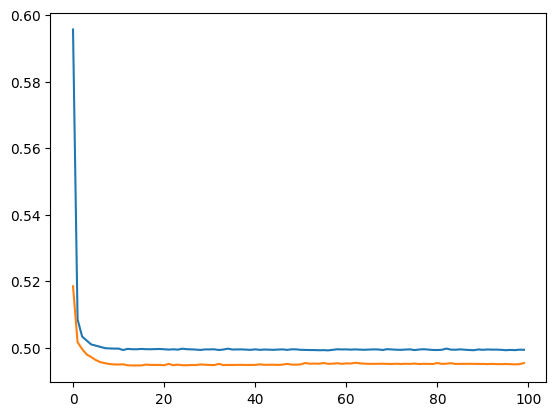

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

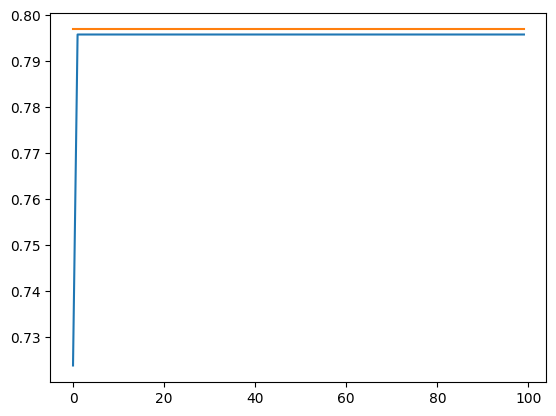

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])